<div style="font-size:1.4em; margin-bottom:2em">
    <div style="float:right; line-height:1.2em;">GET Lab<br />Paderborn University</div>
  <div>SS 2021</div>
</div>
<div style="clear:both"></div>
<div style="text-align:center; font-size:1.8em;">
  Digital Image Processing II<br />Task Sheet 9
</div>

<hr>

### Overview

The properties of spatial correlation have already been studied in connection with image filtering (see task sheet 6 in DIP I). If the filter is interpreted as a *template* for a pattern we are searching for, correlation (the filter result) has its highest values in regions where the image and the filter are similar (for example, the Sobel operator, which is used for edge detection, resembles edge-like structures). The correlation (denoted as $\odot$ here) of a template $w$ with an image $f(x,y)$ is given as follows:

$$(w \odot f)(x, y) = \sum_s \sum_t w(s, t) f(x+s, y+t)$$

In this equation, the limits of the summations are taken over the region shared by $w$ and $f$. This equation is sensitive to changing illumination conditions, which can lead to changes in the amplitude of both functions. While brightness changes can be modeled by an offset (adding or substracting a constant), contrast changes can be modeled by a multiplication. These influences can be compensated for by using the normalized correlation coefficient (NCC):

$$
\gamma(x,y) =
\dfrac{\displaystyle\sum_s \sum_t \left((w(s, t)-\bar{w}\right)\left( f(x+s, y+t) - \bar{f}_{xy}\right)}
{\sqrt{\displaystyle\sum_s \sum_t \left(w(s, t)-\bar{w}\right)^2 \displaystyle\sum_s \sum_t \left(f(x+s, y+t)-\bar{f}_{xy}\right)^2}}
$$

In this equation, $\bar{w}$ is the mean value of the template (computed only once), and $\bar{f}_{xy}$ is the mean value of $f$ of the region shared with the template. Note that this function can be written as the inner product of two individual functions. Furthermore, the denominators correspond to the standard deviation, without normalization with respect to the number of samples. Since the template is virtually slided over the image, this method is also known as sliding-window search.

---

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

dpi = plt.rcParams['figure.dpi']

# plot image in original size
def plot_img_orig(img):
    fig = plt.figure(figsize = (img.shape[1]/dpi, img.shape[0]/dpi))
    fig.add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255) # cmap parameter is ignored for RGB(A) data
    plt.show()

#### <span style="color: RoyalBlue; font-weight: bold;">Task 9.1</span> Normalized Correlation Coefficient (NCC) in 1D

The objective of this task is to study the specific form of the NCC based on 1D examples. The ideas can then be adapted to 2D data (images). Given are the three functions $a$, $b$, and $c$, where $a$ is the template which should be compared with the other two functions.

Implement / solve the following tasks:
1. Compute, print and analyze the correlation results of $a \odot a$, $a \odot b$, and $a \odot c$.
2. Compute and plot the mean-normalized functions $d = a-\bar{a}$, $e = b-\bar{b}$, and $f = c-\bar{c}$.
3. Compute, print and analyze the correlation results of $d \odot d$, $d \odot e$, and $d \odot f$.
4. Compute and plot the fully normalized functions $g = (a-\bar{a})/\tilde{a}$, $h = (b-\bar{b})/\tilde{b}$, and $i = (c-\bar{c})/\tilde{c}$, where the denominators correspond to the denominator of the NCC.
5. Compute, print and analyze the correlation results of $g \odot g$, $g \odot h$, and $g \odot i$.

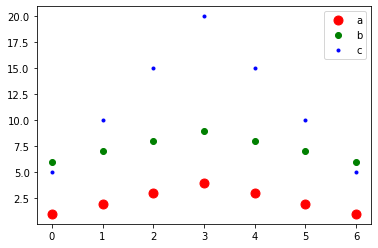

c_aa = 44
c_ab = 124
c_ac = 220


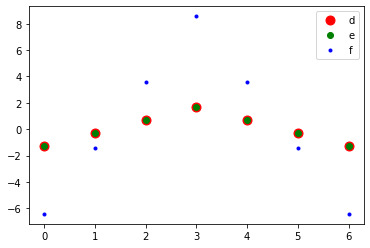

c_dd = 7.42857142857143
c_de = 7.42857142857143
c_df = 37.14285714285714


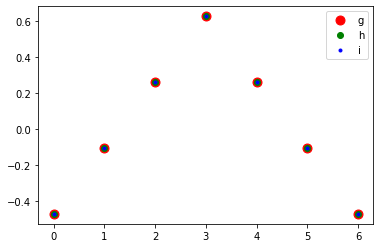

c_dd = 0.9999999999999998
c_de = 0.9999999999999998
c_df = 0.9999999999999999


In [2]:
# write your code here

# define basic discrete functions
a = np.array([1, 2, 3, 4, 3, 2, 1])
b = 5+a
c = 5*a

# plot of the basic functions
plt.plot(a, 'ro', label='a', markersize=9);
plt.plot(b, 'go', label='b', markersize=6);
plt.plot(c, 'bo', label='c', markersize=3);

plt.legend(); plt.show()

# compute and print the correlation result of the functions
c_aa = np.dot(a, a); print("c_aa = " + str(c_aa))
c_ab = np.dot(a, b); print("c_ab = " + str(c_ab))
c_ac = np.dot(a, c); print("c_ac = " + str(c_ac))

# compute the mean-normalized functions
d = a-np.mean(a)
e = b-np.mean(b)
f = c-np.mean(c)

# plot of the mean normalized functions
plt.plot(d, 'ro', label='d', markersize=9);
plt.plot(e, 'go', label='e', markersize=6);
plt.plot(f, 'bo', label='f', markersize=3);

plt.legend(); plt.show()

# compute and print the correlation result of the functions
c_dd = np.dot(d, d); print("c_dd = " + str(c_dd))
c_de = np.dot(d, e); print("c_de = " + str(c_de))
c_df = np.dot(d, f); print("c_df = " + str(c_df))

# compute the mean and std-normalized functions
g = (a-np.mean(a)) / np.sqrt(np.dot(d, d))
h = (b-np.mean(b)) / np.sqrt(np.dot(e, e))
i = (c-np.mean(c)) / np.sqrt(np.dot(f, f))

# plot of the mean and std-normalized functions
plt.plot(g, 'ro', label='g', markersize=9);
plt.plot(h, 'go', label='h', markersize=6);
plt.plot(i, 'bo', label='i', markersize=3);

plt.legend(); plt.show()

# compute and print the correlation result of the functions
c_gg = np.dot(g, g); print("c_dd = " + str(c_gg))
c_gh = np.dot(g, h); print("c_de = " + str(c_gh))
c_gi = np.dot(g, i); print("c_df = " + str(c_gi))

Analyzing the results reveals important properties of the (normalized) cross-correlation. The objective should be that $a \odot a$ yields the highest value. Computing the correlation results without any normalization ($a \odot a$, $a \odot b$, and $a \odot c$), the highest value is achieved for $a \odot c$, simply because $c$ has the largest values ($5$ times larger than the original values).

This property is retained even if the mean-normalized functions are considered. Nonetheless, it can be seen that the mean normalization compensates for the offset ($+5$) because the functions $d$ and $e$ have the same values. The largest correlation is still achieved for $d \odot f$.

Normalizing with respect to the standard deviation leads to the same values for $g$, $h$, and $i$, independent of the offset and multiplication. Note that even both transformations together can be handled by this method (not shown here). Furthermore, the normalization leads to a maximum of 1.0, because the NCC can be interpreted as the inner product of two unit vectors, which is in range of $[-1, 1]$.

#### <span style="color: RoyalBlue; font-weight: bold;">Task 9.2</span> Template Matching

The objective of this task is to use the NCC for template matching. For this purpose, the folder *images* contains test images.

Implement / solve the following tasks:
1. Implement the NCC based on the formula from the overview.
2. Plot the normalized correlation result in an appropriate form (e.g., clip negative values).
3. Draw appropriate bounding boxes around the positions with the highest correlation values (comparison with a threshold).

Note: It can be assumed that the template has a square shape of odd size. Image borders can be neglected. The corresponding OpenCV function not be used here is <a href="https://docs.opencv.org/4.2.0/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be">`matchTemplate`</a>.

Template:


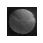

Input image:


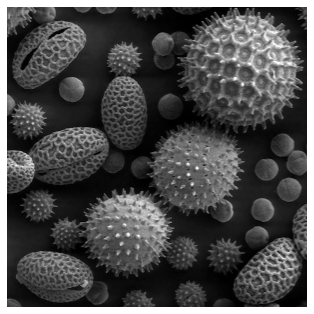

Correlation result (negative values clipped):


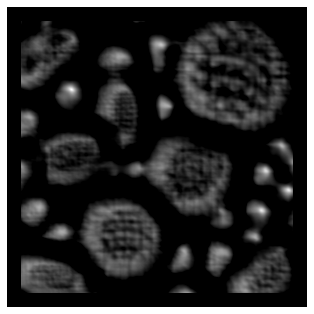

After comparison with a threshold:


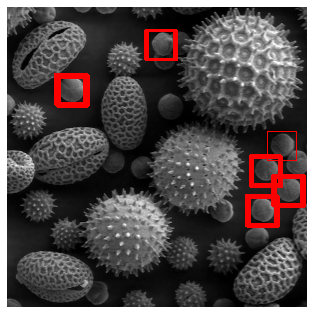

In [3]:
# write your code here

# read images as grayscale images (parameter 0)
img = cv2.imread('images/pollen.png', 0) # input image
tpl = cv2.imread('images/pollen-template.png', 0) # template

# plot of the images
print("Template:"); plot_img_orig(tpl)
print("Input image:"); plot_img_orig(img)

# empty result image
rows, cols = img.shape
res = np.zeros((rows, cols), dtype=np.float64)

# compute offset for template matching
rows_tpl, cols_tpl = tpl.shape
b = int(rows_tpl / 2)

# compute (w-mean(w)) and denominator
tpl_mn = tpl-np.mean(tpl) # mn = mean normalized
tpl_dn = np.sqrt(tpl.size) * np.std(tpl) # dn = denominator

# compute the NCC
ext = [] # empty array to save extrema

for i in range(b, rows-b):
    for j in range(b, cols-b):
        # get local neighborhood
        nbh = img[i-b:i+b+1, j-b:j+b+1]

        # compute (f-mean(f)) and denominator
        nbh_mn = nbh-np.mean(nbh) # mn = mean normalized
        nbh_dn = np.sqrt(nbh.size) * np.std(nbh) # dn = denominator
        
        # multiply, sum up and normalize
        tmp = np.multiply(tpl_mn, nbh_mn) # element-wise multiplication
        tmp = np.sum(tmp)
        tmp = tmp / (tpl_dn * nbh_dn)
        
        # save the result
        res[i, j] = tmp
        
        # save position for values above threshold
        if tmp > 0.68:
            ext.append([i, j])
        
# plot the result (multiply by 255 so that negative values are clipped when plotted)
res_n = res*255
print("Correlation result (negative values clipped):")
plot_img_orig(res_n)
                    
# highlight positions
img_plt = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) # convert to RGB
for i in range(len(ext)):
    row = ext[i][0]
    col = ext[i][1]
    
    cv2.rectangle(img_plt, (col-b, row-b), (col+b+1, row+b+1), (255, 0, 0), 1) # note that x is the horizontal axis in opencv
    
print("After comparison with a threshold:")
plot_img_orig(img_plt)

Note that we get more than one response around the maxima (that is why the borders of the bounding boxes are relatively thick). In these cases, non-maximum suppression can be used to get only single responses. To handle scale changes, the method can be combined with image pyramids. A better solution for such problems is usually to provide several examples of the pattern of interest (training images) and then use a classification scheme. Instead of a sliding-window approach, the image can be segmented so that only segments needs to be analyzed.